In [2]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
import pylab as plt
import matplotlib.cm as cm

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# What does the data look like?
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

/Users/jdumoulin/Envs/python3notebooks/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/jdumoulin/Envs/python3notebooks/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


label :  8


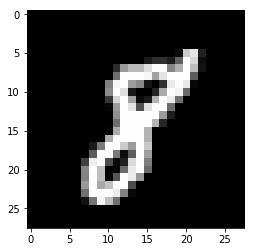

In [3]:
# x_train is 60,000 images, so let's look at one of the images
i = np.where(y_train==8)[0][0]
print("label : ", y_train[i])
sample = x_train[i, ...]
sample.shape
plt.imshow(sample, cmap=cm.gray)
plt.show()

In [4]:
# the data should be in a flat array for each sample, so we will reshape from 28 * 28 to 784
x_train = x_train.reshape(60000,28*28)
print(x_train.shape)

# We will one-hot encode the labels
y_train = to_categorical(y_train)

(60000, 784)


In [5]:
print(y_train.shape)
print("label : ", y_train[i, :])

(60000, 10)
label :  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [9]:
# ok now let's get a cross-validation set from the training data.
from sklearn.model_selection import train_test_split
x_train_part, x_train_val, y_train_part, y_train_val = \
    train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=np.argmax(y_train, axis=1))

In [32]:
# now we will define the logistic regression classification model.
from keras import models
from keras import layers
from keras import optimizers

model1 = models.Sequential()
model1.add(layers.Dense(16, activation='relu', input_shape=(784,)))
model1.add(layers.Dense(10, activation='softmax'))

#compile the model
model1.compile(optimizer="rmsprop",
    #optimizer=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [33]:
# now fit the model...
eps = 25
history = model1.fit(x_train_part,
                    y_train_part,
                    batch_size=1024,
                    epochs=eps,
                    validation_data=(x_train_val, y_train_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 1s 11us/step - loss: 6.2079 - acc: 0.4947 - val_loss: 2.4353 - val_acc: 0.5072
Epoch 2/25
48000/48000 [==============================] - 0s 4us/step - loss: 1.8312 - acc: 0.4967 - val_loss: 1.5193 - val_acc: 0.5548
Epoch 3/25
48000/48000 [==============================] - 0s 4us/step - loss: 1.3668 - acc: 0.6239 - val_loss: 1.2651 - val_acc: 0.6505
Epoch 4/25
48000/48000 [==============================] - 0s 4us/step - loss: 1.1633 - acc: 0.6933 - val_loss: 1.1644 - val_acc: 0.7062
Epoch 5/25
48000/48000 [==============================] - 0s 4us/step - loss: 1.0359 - acc: 0.7375 - val_loss: 1.0740 - val_acc: 0.7300
Epoch 6/25
48000/48000 [==============================] - 0s 4us/step - loss: 0.9282 - acc: 0.7626 - val_loss: 0.9702 - val_acc: 0.7617
Epoch 7/25
48000/48000 [==============================] - 0s 4us/step - loss: 0.8601 - acc: 0.7800 - val_loss: 0.9377 - val_acc: 0.75

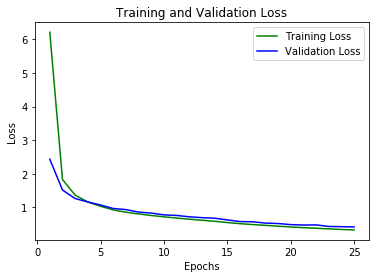

In [34]:
# plot the learning parameters
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, eps + 1)

plt.plot(epochs, loss_values, 'g', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

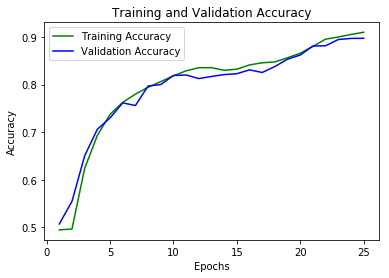

In [35]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [36]:
# That wasn't too bad.  Over 80% accuracy.  Let's look at the confusion
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model1.predict(x_test.reshape(10000, 28*28))
y_pred_test = np.argmax(y_pred, axis=1)

confusion_matrix(y_test, y_pred_test)

array([[ 928,    0,    2,    1,    0,   10,   19,    3,   17,    0],
       [   0, 1103,    0,    7,    0,    0,    5,    1,   19,    0],
       [   9,    3,  904,   35,    2,    5,    8,   10,   52,    4],
       [   1,    2,   14,  921,    0,   26,    0,   11,   32,    3],
       [   2,    2,    3,    0,  863,    0,   19,    3,   22,   68],
       [  18,    1,    0,  120,    2,  695,   10,    0,   35,   11],
       [   6,    3,    2,    4,    3,   13,  912,    1,   14,    0],
       [   4,    3,   21,   20,    2,    1,    0,  946,    8,   23],
       [  10,    3,    2,  123,    8,   24,    3,    5,  775,   21],
       [   7,    3,    0,   14,   11,   10,    0,    7,   18,  939]])

In [37]:
print(classification_report(y_test, y_pred_test))

             precision    recall  f1-score   support

          0       0.94      0.95      0.94       980
          1       0.98      0.97      0.98      1135
          2       0.95      0.88      0.91      1032
          3       0.74      0.91      0.82      1010
          4       0.97      0.88      0.92       982
          5       0.89      0.78      0.83       892
          6       0.93      0.95      0.94       958
          7       0.96      0.92      0.94      1028
          8       0.78      0.80      0.79       974
          9       0.88      0.93      0.90      1009

avg / total       0.90      0.90      0.90     10000



In [38]:
# Two hidden layers.
model2 = models.Sequential()
model2.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

#compile the model
model2.compile(optimizer="rmsprop",
    #optimizer=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [13]:
# now fit the model...
eps = 25
history = model2.fit(x_train_part,
                    y_train_part,
                    batch_size=1024,
                    epochs=eps,
                    validation_data=(x_train_val, y_train_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 1s 12us/step - loss: 6.6358 - acc: 0.3866 - val_loss: 1.9284 - val_acc: 0.4142
Epoch 2/25
48000/48000 [==============================] - 0s 8us/step - loss: 1.6249 - acc: 0.4846 - val_loss: 1.4305 - val_acc: 0.5597
Epoch 3/25
48000/48000 [==============================] - 0s 8us/step - loss: 1.3007 - acc: 0.6001 - val_loss: 1.2493 - val_acc: 0.6353
Epoch 4/25
48000/48000 [==============================] - 0s 9us/step - loss: 1.1520 - acc: 0.6501 - val_loss: 1.1236 - val_acc: 0.6511
Epoch 5/25
48000/48000 [==============================] - 0s 8us/step - loss: 1.0638 - acc: 0.6734 - val_loss: 1.0690 - val_acc: 0.6731
Epoch 6/25
48000/48000 [==============================] - 0s 9us/step - loss: 0.9965 - acc: 0.6918 - val_loss: 1.0041 - val_acc: 0.7047
Epoch 7/25
48000/48000 [==============================] - 0s 8us/step - loss: 0.9420 - acc: 0.7013 - val_loss: 0.9634 - val_acc: 0.70

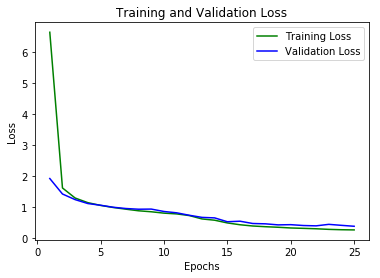

In [14]:
# plot the learning parameters
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, eps + 1)

plt.plot(epochs, loss_values, 'g', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

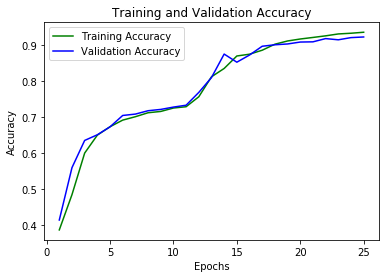

In [15]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [16]:
# That wasn't too bad.  Over 80% accuracy.  Let's look at the confusion
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model2.predict(x_test.reshape(10000, 28*28))
y_pred_test = np.argmax(y_pred, axis=1)

confusion_matrix(y_test, y_pred_test)

array([[ 940,    0,    3,    2,    0,    2,   14,    1,    3,   15],
       [   0, 1105,    3,    4,    0,    1,    7,    0,    4,   11],
       [   4,    0,  946,   21,    6,    6,   20,    6,   17,    6],
       [   0,    0,   10,  936,    0,   21,    1,    6,   11,   25],
       [   1,    0,    7,    0,  876,    0,   10,    1,    3,   84],
       [   2,    1,    1,   20,    0,  843,    8,    0,    4,   13],
       [   5,    2,    4,    0,    4,   14,  920,    0,    2,    7],
       [   0,    3,    9,    9,    2,    1,    5,  915,    2,   82],
       [   2,    0,   12,    6,    2,   11,    6,    0,  910,   25],
       [   3,    2,    0,    5,   36,    5,    2,    3,    6,  947]],
      dtype=int64)

In [17]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       980
           1       0.99      0.97      0.98      1135
           2       0.95      0.92      0.93      1032
           3       0.93      0.93      0.93      1010
           4       0.95      0.89      0.92       982
           5       0.93      0.95      0.94       892
           6       0.93      0.96      0.94       958
           7       0.98      0.89      0.93      1028
           8       0.95      0.93      0.94       974
           9       0.78      0.94      0.85      1009

   micro avg       0.93      0.93      0.93     10000
   macro avg       0.94      0.93      0.93     10000
weighted avg       0.94      0.93      0.93     10000

